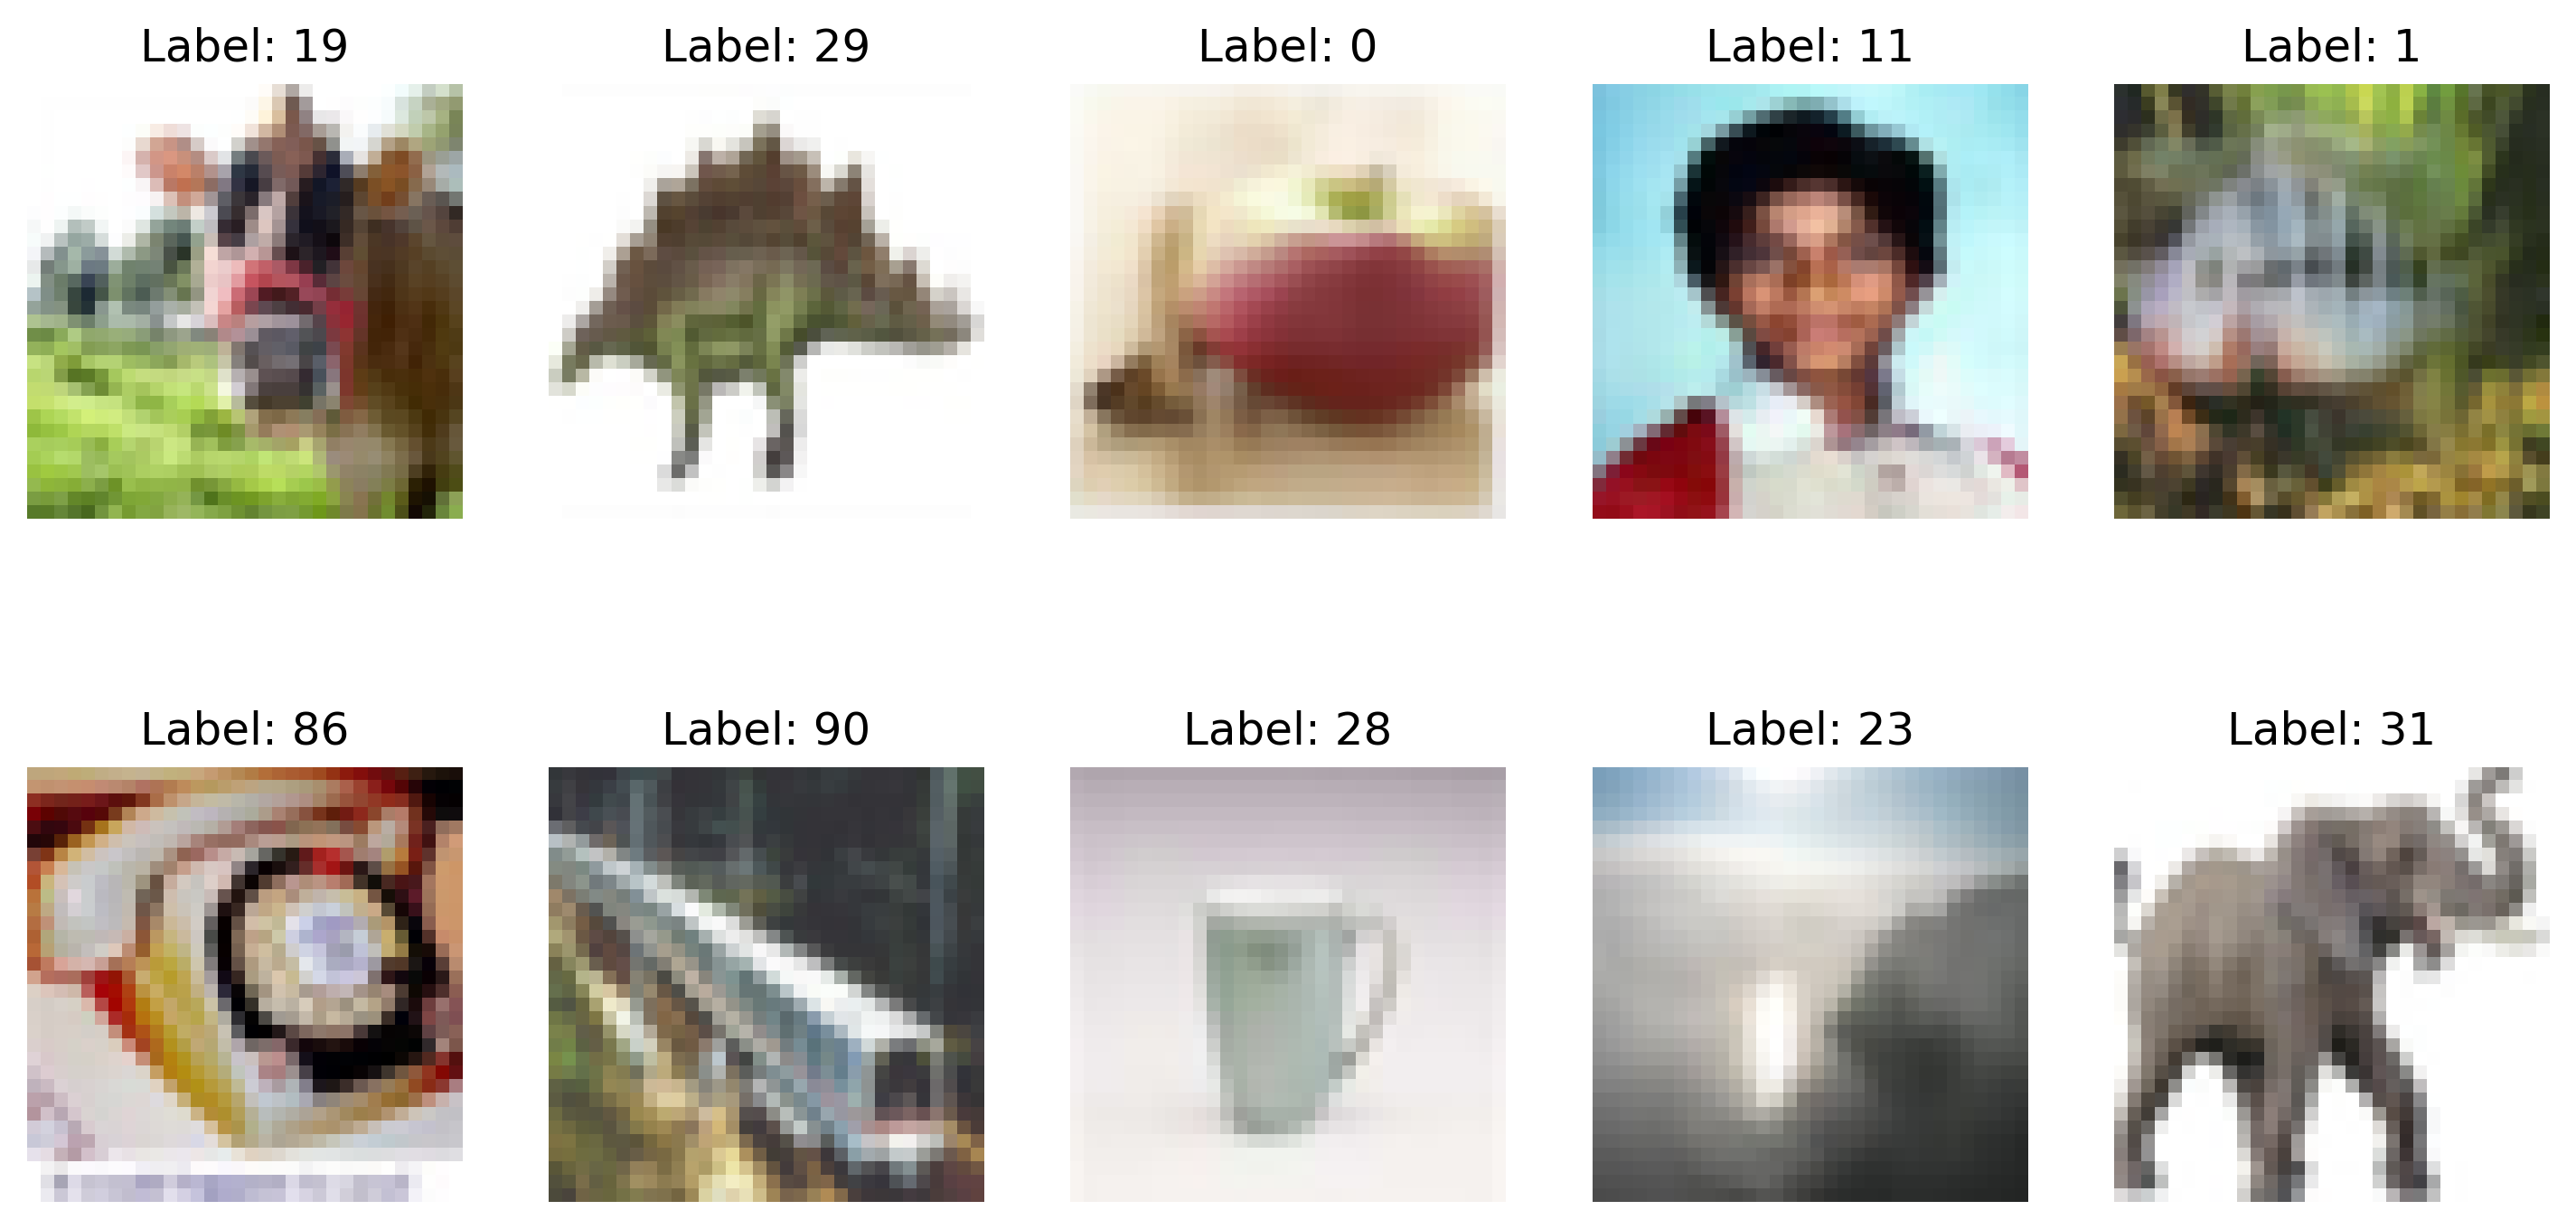

Training VGG16 model...
Epoch 1/20
 57/704 [=>............................] - ETA: 1:19:23 - loss: 4.6297 - accuracy: 0.0121

KeyboardInterrupt: ignored

In [8]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, 100)
y_test = keras.utils.to_categorical(y_test, 100)

# Data visualization - Show sample images from the training set
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.axis('off')
    ax.set_title(f'Label: {np.argmax(y_train[i])}')
plt.show()

# Create VGG16 model with pre-trained ImageNet weights
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = GlobalAveragePooling2D()(base_model_vgg.output)
x = Dense(256, activation='relu')(x)
predictions_vgg = Dense(100, activation='softmax')(x)
model_vgg = keras.models.Model(inputs=base_model_vgg.input, outputs=predictions_vgg)

# Create ResNet50 model with pre-trained ImageNet weights
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = GlobalAveragePooling2D()(base_model_resnet.output)
x = Dense(256, activation='relu')(x)
predictions_resnet = Dense(100, activation='softmax')(x)
model_resnet = keras.models.Model(inputs=base_model_resnet.input, outputs=predictions_resnet)

# Compile models
model_vgg.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model_resnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train VGG16 model
print("Training VGG16 model...")
vgg_history = model_vgg.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.1, callbacks=[EarlyStopping(patience=3)])

# Train ResNet50 model
print("Training ResNet50 model...")
resnet_history = model_resnet.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.1, callbacks=[EarlyStopping(patience=3)])

# Evaluate both models on the test set
vgg_accuracy = model_vgg.evaluate(x_test, y_test)[1]
resnet_accuracy = model_resnet.evaluate(x_test, y_test)[1]

# Select the model with the highest accuracy
if vgg_accuracy > resnet_accuracy:
    selected_model = model_vgg
    selected_model_name = "VGG16"
    selected_history = vgg_history
else:
    selected_model = model_resnet
    selected_model_name = "ResNet50"
    selected_history = resnet_history

print(f"The selected model is {selected_model_name} with an accuracy of {selected_model.evaluate(x_test, y_test)[1]}")

# Data visualization - Plot training and validation accuracy
plt.plot(selected_history.history['accuracy'], label='Training Accuracy')
plt.plot(selected_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title(f'{selected_model_name} Training and Validation Accuracy')
plt.show()

# Data visualization - Plot training and validation loss
plt.plot(selected_history.history['loss'], label='Training Loss')
plt.plot(selected_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title(f'{selected_model_name} Training and Validation Loss')
plt.show()
